<a href="https://colab.research.google.com/github/saket2343/Housing-Price-Prediction-Using-Linear-Regression/blob/main/Housing_Price_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

We aim to build a linear regression model to predict housing prices. The training dataset contains three examples with four features: size (sqft), number of bedrooms, number of floors, and age of the home. The target variable is the price of the house (in thousands of dollars). The dataset is shown below:

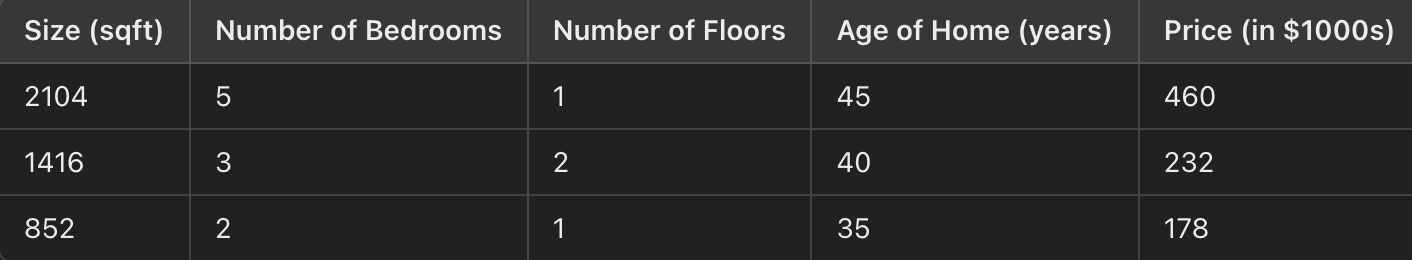

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [5]:
x_train=np.array([[2104,5,1,45], [1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

In [13]:
b_init=0
w_init=np.array([0,0,0,0])

# Computing cost

In [18]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  cost=0
  for i in range(m):
    f_wb_i=np.dot(x[i],w)+b
    cost=cost+(f_wb_i-y[i])**2
  cost=cost/(2*m)
  return cost

In [19]:
cost=compute_cost(x_train,y_train,w_init,b_init)
print(cost)

49518.0


# **Gradient Descent**

Computing Gradient

In [22]:
def compute_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(x[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i,j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [23]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -290.0
dj_dw at initial w,b: [-4.83e+05 -1.12e+03 -3.67e+02 -1.21e+04]


Computing Gradient Descent

In [24]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
  m,n=x.shape
  j_history=[]
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(num_iters):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w= w - alpha * dj_dw
    b = b - alpha * dj_db

    if i<100000:
      j_history.append(cost_function(x, y, w, b))

    if i%math.ceil(num_iters/10) == 0:
      print(f'Interation {i:4d}: Cost {j_history[-1]:8.2f}')

  return w, b, j_history

In [25]:
intial_w=np.zeros_like(w_init)
intial_b=0

iterations = 1000
alpha = 5.0e-7

w_final, b_final, j_hist = gradient_descent(x_train, y_train, intial_w, intial_b, compute_cost, compute_gradient, alpha, iterations)
print(f'b,w found by gradient descent: {b_final:0.2f},{w_final} ')


Interation    0: Cost  2529.46
Interation  100: Cost   695.99
Interation  200: Cost   694.92
Interation  300: Cost   693.86
Interation  400: Cost   692.81
Interation  500: Cost   691.77
Interation  600: Cost   690.73
Interation  700: Cost   689.71
Interation  800: Cost   688.70
Interation  900: Cost   687.69
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 


In [35]:
m = x_train.shape[0]
y_predicted=np.zeros(m)
for i in range(m):
  y_predicted[i]=np.dot(x_train[i],w_final)+b_final
  print(f'prediction price: {y_predicted[i]}, target value: {y_train[i]}')

prediction price: 426.18530497189204, target value: 460
prediction price: 286.1674720078562, target value: 232
prediction price: 171.46763087132317, target value: 178


# **Graph of Cost vs iteration**

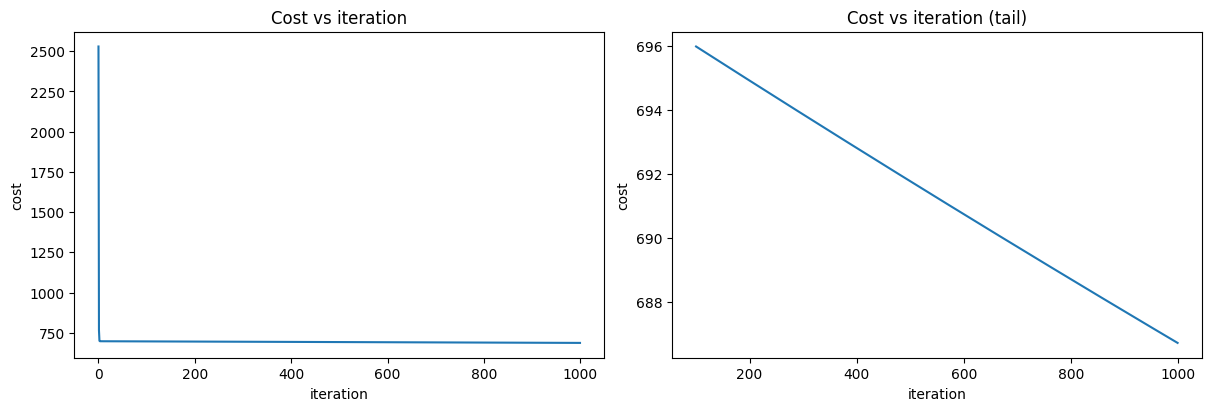

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize = (12,4))
ax1.plot(j_hist)
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax1.set_title('Cost vs iteration')
ax2.set_title('Cost vs iteration (tail)')
ax1.set_xlabel('iteration'); ax1.set_ylabel('cost')
ax2.set_xlabel('iteration'); ax2.set_ylabel('cost')

plt.show()

# **Graph of actual price vs predicted price**

price vs size

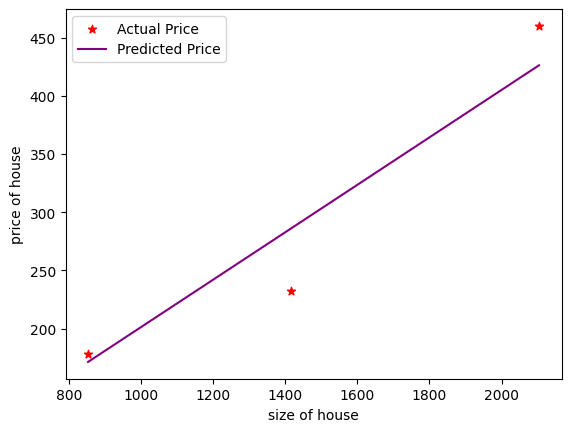

In [38]:
plt.scatter(x_train[:,0],y_train, marker='*',label='Actual Price', color='red')
plt.plot(x_train[:,0],y_predicted, label='Predicted Price', color='purple')
plt.xlabel('size of house'); plt.ylabel('price of house')
plt.legend()
plt.show()